In [1]:
import os
import librosa
import math
import json
import numpy as np
from sklearn.model_selection import train_test_split
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"
import tensorflow as tf
import matplotlib.pyplot as plt
from glob import glob

In [2]:
# GTZAN Dataset :  music Marsyas dataset
DATASET_PATH = "./data/Ravdess"
JSON_PATH = "./outputs/ravdess_complete.json"
SAMPLE_RATE = 22050
DURATION = 3 # duration of each track is 30 s
SAMPLES_PER_TRACK = SAMPLE_RATE *DURATION

In [71]:
glob(DATASET_PATH)

['./data/Ravdess']

In [72]:
def save_mfcc(dataset_path,json_path,n_fft=2048,hop_length=512,n_mfcc=13,num_segments=1):
    # dictionary of data
    data = {
            "mfcc":[],
            "labels":[]
           }
    num_samples_per_segment = int(SAMPLES_PER_TRACK/num_segments)
    print(num_samples_per_segment)
    expected_num_mfcc_vectors_per_segment = math.ceil(num_samples_per_segment/hop_length)
    for i,(dirpath,dirnames,filenames) in enumerate(os.walk(dataset_path)):
        #ensure that you are not at root level
        if dirpath is not dataset_path:
            dirpath_components = dirpath.split('\'')
            #process files for specific genre
            for f in filenames:
                filepath = os.path.join(dirpath,f)
                print(filepath)
                signal,sr =librosa.load(filepath,sr=SAMPLE_RATE)
                #process segments extracting mfcc and storing data

                for s in range(num_segments):
                    start_sample = num_samples_per_segment * s
                    finish_sample = start_sample + num_samples_per_segment

                    mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],sr=sr,n_mfcc=n_mfcc,n_fft=n_fft,hop_length=hop_length)
                    mfcc = mfcc.T
                    
                    #store mfcc for segment if it has the expected length
                    if len(mfcc) == expected_num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(int(filepath.split('\\')[-1].split('-')[2])-1)
                    
    with open(json_path,"w") as fp:
        json.dump(data,fp,indent=4)

In [73]:
save_mfcc(DATASET_PATH,JSON_PATH,num_segments=1)

66150
./data/Ravdess\Actor_01\03-01-01-01-01-01-01.wav
./data/Ravdess\Actor_01\03-01-01-01-01-02-01.wav
./data/Ravdess\Actor_01\03-01-01-01-02-01-01.wav
./data/Ravdess\Actor_01\03-01-01-01-02-02-01.wav
./data/Ravdess\Actor_01\03-01-02-01-01-01-01.wav
./data/Ravdess\Actor_01\03-01-02-01-01-02-01.wav
./data/Ravdess\Actor_01\03-01-02-01-02-01-01.wav
./data/Ravdess\Actor_01\03-01-02-01-02-02-01.wav
./data/Ravdess\Actor_01\03-01-02-02-01-01-01.wav
./data/Ravdess\Actor_01\03-01-02-02-01-02-01.wav
./data/Ravdess\Actor_01\03-01-02-02-02-01-01.wav
./data/Ravdess\Actor_01\03-01-02-02-02-02-01.wav
./data/Ravdess\Actor_01\03-01-03-01-01-01-01.wav
./data/Ravdess\Actor_01\03-01-03-01-01-02-01.wav
./data/Ravdess\Actor_01\03-01-03-01-02-01-01.wav
./data/Ravdess\Actor_01\03-01-03-01-02-02-01.wav
./data/Ravdess\Actor_01\03-01-03-02-01-01-01.wav
./data/Ravdess\Actor_01\03-01-03-02-01-02-01.wav
./data/Ravdess\Actor_01\03-01-03-02-02-01-01.wav
./data/Ravdess\Actor_01\03-01-03-02-02-02-01.wav
./data/Ravdess

./data/Ravdess\Actor_03\03-01-07-02-01-01-03.wav
./data/Ravdess\Actor_03\03-01-07-02-01-02-03.wav
./data/Ravdess\Actor_03\03-01-07-02-02-01-03.wav
./data/Ravdess\Actor_03\03-01-07-02-02-02-03.wav
./data/Ravdess\Actor_03\03-01-08-01-01-01-03.wav
./data/Ravdess\Actor_03\03-01-08-01-01-02-03.wav
./data/Ravdess\Actor_03\03-01-08-01-02-01-03.wav
./data/Ravdess\Actor_03\03-01-08-01-02-02-03.wav
./data/Ravdess\Actor_03\03-01-08-02-01-01-03.wav
./data/Ravdess\Actor_03\03-01-08-02-01-02-03.wav
./data/Ravdess\Actor_03\03-01-08-02-02-01-03.wav
./data/Ravdess\Actor_03\03-01-08-02-02-02-03.wav
./data/Ravdess\Actor_04\03-01-01-01-01-01-04.wav
./data/Ravdess\Actor_04\03-01-01-01-01-02-04.wav
./data/Ravdess\Actor_04\03-01-01-01-02-01-04.wav
./data/Ravdess\Actor_04\03-01-01-01-02-02-04.wav
./data/Ravdess\Actor_04\03-01-02-01-01-01-04.wav
./data/Ravdess\Actor_04\03-01-02-01-01-02-04.wav
./data/Ravdess\Actor_04\03-01-02-01-02-01-04.wav
./data/Ravdess\Actor_04\03-01-02-01-02-02-04.wav
./data/Ravdess\Actor

./data/Ravdess\Actor_06\03-01-06-01-01-01-06.wav
./data/Ravdess\Actor_06\03-01-06-01-01-02-06.wav
./data/Ravdess\Actor_06\03-01-06-01-02-01-06.wav
./data/Ravdess\Actor_06\03-01-06-01-02-02-06.wav
./data/Ravdess\Actor_06\03-01-06-02-01-01-06.wav
./data/Ravdess\Actor_06\03-01-06-02-01-02-06.wav
./data/Ravdess\Actor_06\03-01-06-02-02-01-06.wav
./data/Ravdess\Actor_06\03-01-06-02-02-02-06.wav
./data/Ravdess\Actor_06\03-01-07-01-01-01-06.wav
./data/Ravdess\Actor_06\03-01-07-01-01-02-06.wav
./data/Ravdess\Actor_06\03-01-07-01-02-01-06.wav
./data/Ravdess\Actor_06\03-01-07-01-02-02-06.wav
./data/Ravdess\Actor_06\03-01-07-02-01-01-06.wav
./data/Ravdess\Actor_06\03-01-07-02-01-02-06.wav
./data/Ravdess\Actor_06\03-01-07-02-02-01-06.wav
./data/Ravdess\Actor_06\03-01-07-02-02-02-06.wav
./data/Ravdess\Actor_06\03-01-08-01-01-01-06.wav
./data/Ravdess\Actor_06\03-01-08-01-01-02-06.wav
./data/Ravdess\Actor_06\03-01-08-01-02-01-06.wav
./data/Ravdess\Actor_06\03-01-08-01-02-02-06.wav
./data/Ravdess\Actor

./data/Ravdess\Actor_09\03-01-04-02-01-01-09.wav
./data/Ravdess\Actor_09\03-01-04-02-01-02-09.wav
./data/Ravdess\Actor_09\03-01-04-02-02-01-09.wav
./data/Ravdess\Actor_09\03-01-04-02-02-02-09.wav
./data/Ravdess\Actor_09\03-01-05-01-01-01-09.wav
./data/Ravdess\Actor_09\03-01-05-01-01-02-09.wav
./data/Ravdess\Actor_09\03-01-05-01-02-01-09.wav
./data/Ravdess\Actor_09\03-01-05-01-02-02-09.wav
./data/Ravdess\Actor_09\03-01-05-02-01-01-09.wav
./data/Ravdess\Actor_09\03-01-05-02-01-02-09.wav
./data/Ravdess\Actor_09\03-01-05-02-02-01-09.wav
./data/Ravdess\Actor_09\03-01-05-02-02-02-09.wav
./data/Ravdess\Actor_09\03-01-06-01-01-01-09.wav
./data/Ravdess\Actor_09\03-01-06-01-01-02-09.wav
./data/Ravdess\Actor_09\03-01-06-01-02-01-09.wav
./data/Ravdess\Actor_09\03-01-06-01-02-02-09.wav
./data/Ravdess\Actor_09\03-01-06-02-01-01-09.wav
./data/Ravdess\Actor_09\03-01-06-02-01-02-09.wav
./data/Ravdess\Actor_09\03-01-06-02-02-01-09.wav
./data/Ravdess\Actor_09\03-01-06-02-02-02-09.wav
./data/Ravdess\Actor

./data/Ravdess\Actor_12\03-01-03-01-01-01-12.wav
./data/Ravdess\Actor_12\03-01-03-01-01-02-12.wav
./data/Ravdess\Actor_12\03-01-03-01-02-01-12.wav
./data/Ravdess\Actor_12\03-01-03-01-02-02-12.wav
./data/Ravdess\Actor_12\03-01-03-02-01-01-12.wav
./data/Ravdess\Actor_12\03-01-03-02-01-02-12.wav
./data/Ravdess\Actor_12\03-01-03-02-02-01-12.wav
./data/Ravdess\Actor_12\03-01-03-02-02-02-12.wav
./data/Ravdess\Actor_12\03-01-04-01-01-01-12.wav
./data/Ravdess\Actor_12\03-01-04-01-01-02-12.wav
./data/Ravdess\Actor_12\03-01-04-01-02-01-12.wav
./data/Ravdess\Actor_12\03-01-04-01-02-02-12.wav
./data/Ravdess\Actor_12\03-01-04-02-01-01-12.wav
./data/Ravdess\Actor_12\03-01-04-02-01-02-12.wav
./data/Ravdess\Actor_12\03-01-04-02-02-01-12.wav
./data/Ravdess\Actor_12\03-01-04-02-02-02-12.wav
./data/Ravdess\Actor_12\03-01-05-01-01-01-12.wav
./data/Ravdess\Actor_12\03-01-05-01-01-02-12.wav
./data/Ravdess\Actor_12\03-01-05-01-02-01-12.wav
./data/Ravdess\Actor_12\03-01-05-01-02-02-12.wav
./data/Ravdess\Actor

./data/Ravdess\Actor_15\03-01-01-01-01-01-15.wav
./data/Ravdess\Actor_15\03-01-01-01-01-02-15.wav
./data/Ravdess\Actor_15\03-01-01-01-02-01-15.wav
./data/Ravdess\Actor_15\03-01-01-01-02-02-15.wav
./data/Ravdess\Actor_15\03-01-02-01-01-01-15.wav
./data/Ravdess\Actor_15\03-01-02-01-01-02-15.wav
./data/Ravdess\Actor_15\03-01-02-01-02-01-15.wav
./data/Ravdess\Actor_15\03-01-02-01-02-02-15.wav
./data/Ravdess\Actor_15\03-01-02-02-01-01-15.wav
./data/Ravdess\Actor_15\03-01-02-02-01-02-15.wav
./data/Ravdess\Actor_15\03-01-02-02-02-01-15.wav
./data/Ravdess\Actor_15\03-01-02-02-02-02-15.wav
./data/Ravdess\Actor_15\03-01-03-01-01-01-15.wav
./data/Ravdess\Actor_15\03-01-03-01-01-02-15.wav
./data/Ravdess\Actor_15\03-01-03-01-02-01-15.wav
./data/Ravdess\Actor_15\03-01-03-01-02-02-15.wav
./data/Ravdess\Actor_15\03-01-03-02-01-01-15.wav
./data/Ravdess\Actor_15\03-01-03-02-01-02-15.wav
./data/Ravdess\Actor_15\03-01-03-02-02-01-15.wav
./data/Ravdess\Actor_15\03-01-03-02-02-02-15.wav
./data/Ravdess\Actor

./data/Ravdess\Actor_17\03-01-07-02-01-01-17.wav
./data/Ravdess\Actor_17\03-01-07-02-01-02-17.wav
./data/Ravdess\Actor_17\03-01-07-02-02-01-17.wav
./data/Ravdess\Actor_17\03-01-07-02-02-02-17.wav
./data/Ravdess\Actor_17\03-01-08-01-01-01-17.wav
./data/Ravdess\Actor_17\03-01-08-01-01-02-17.wav
./data/Ravdess\Actor_17\03-01-08-01-02-01-17.wav
./data/Ravdess\Actor_17\03-01-08-01-02-02-17.wav
./data/Ravdess\Actor_17\03-01-08-02-01-01-17.wav
./data/Ravdess\Actor_17\03-01-08-02-01-02-17.wav
./data/Ravdess\Actor_17\03-01-08-02-02-01-17.wav
./data/Ravdess\Actor_17\03-01-08-02-02-02-17.wav
./data/Ravdess\Actor_18\03-01-01-01-01-01-18.wav
./data/Ravdess\Actor_18\03-01-01-01-01-02-18.wav
./data/Ravdess\Actor_18\03-01-01-01-02-01-18.wav
./data/Ravdess\Actor_18\03-01-01-01-02-02-18.wav
./data/Ravdess\Actor_18\03-01-02-01-01-01-18.wav
./data/Ravdess\Actor_18\03-01-02-01-01-02-18.wav
./data/Ravdess\Actor_18\03-01-02-01-02-01-18.wav
./data/Ravdess\Actor_18\03-01-02-01-02-02-18.wav
./data/Ravdess\Actor

./data/Ravdess\Actor_20\03-01-06-01-01-01-20.wav
./data/Ravdess\Actor_20\03-01-06-01-01-02-20.wav
./data/Ravdess\Actor_20\03-01-06-01-02-01-20.wav
./data/Ravdess\Actor_20\03-01-06-01-02-02-20.wav
./data/Ravdess\Actor_20\03-01-06-02-01-01-20.wav
./data/Ravdess\Actor_20\03-01-06-02-01-02-20.wav
./data/Ravdess\Actor_20\03-01-06-02-02-01-20.wav
./data/Ravdess\Actor_20\03-01-06-02-02-02-20.wav
./data/Ravdess\Actor_20\03-01-07-01-01-01-20.wav
./data/Ravdess\Actor_20\03-01-07-01-01-02-20.wav
./data/Ravdess\Actor_20\03-01-07-01-02-01-20.wav
./data/Ravdess\Actor_20\03-01-07-01-02-02-20.wav
./data/Ravdess\Actor_20\03-01-07-02-01-01-20.wav
./data/Ravdess\Actor_20\03-01-07-02-01-02-20.wav
./data/Ravdess\Actor_20\03-01-07-02-02-01-20.wav
./data/Ravdess\Actor_20\03-01-07-02-02-02-20.wav
./data/Ravdess\Actor_20\03-01-08-01-01-01-20.wav
./data/Ravdess\Actor_20\03-01-08-01-01-02-20.wav
./data/Ravdess\Actor_20\03-01-08-01-02-01-20.wav
./data/Ravdess\Actor_20\03-01-08-01-02-02-20.wav
./data/Ravdess\Actor

./data/Ravdess\Actor_23\03-01-04-02-01-01-23.wav
./data/Ravdess\Actor_23\03-01-04-02-01-02-23.wav
./data/Ravdess\Actor_23\03-01-04-02-02-01-23.wav
./data/Ravdess\Actor_23\03-01-04-02-02-02-23.wav
./data/Ravdess\Actor_23\03-01-05-01-01-01-23.wav
./data/Ravdess\Actor_23\03-01-05-01-01-02-23.wav
./data/Ravdess\Actor_23\03-01-05-01-02-01-23.wav
./data/Ravdess\Actor_23\03-01-05-01-02-02-23.wav
./data/Ravdess\Actor_23\03-01-05-02-01-01-23.wav
./data/Ravdess\Actor_23\03-01-05-02-01-02-23.wav
./data/Ravdess\Actor_23\03-01-05-02-02-01-23.wav
./data/Ravdess\Actor_23\03-01-05-02-02-02-23.wav
./data/Ravdess\Actor_23\03-01-06-01-01-01-23.wav
./data/Ravdess\Actor_23\03-01-06-01-01-02-23.wav
./data/Ravdess\Actor_23\03-01-06-01-02-01-23.wav
./data/Ravdess\Actor_23\03-01-06-01-02-02-23.wav
./data/Ravdess\Actor_23\03-01-06-02-01-01-23.wav
./data/Ravdess\Actor_23\03-01-06-02-01-02-23.wav
./data/Ravdess\Actor_23\03-01-06-02-02-01-23.wav
./data/Ravdess\Actor_23\03-01-06-02-02-02-23.wav
./data/Ravdess\Actor

In [31]:
# loading mfcc data
def load_data(dataset_path):
    with open(dataset_path,'r') as fp:
        data = json.load(fp)
        
    #convert lists to numpy arrays
    inputs = np.array(data["mfcc"])
    targets = np.array(data["labels"])
    
    return inputs,targets

In [32]:
inputs,targets = load_data(JSON_PATH)

In [33]:
inputs.shape,targets.shape #(22050*3/512)

((1438, 130, 13), (1438,))

In [34]:
targets

array([0, 0, 0, ..., 7, 7, 7])

In [35]:
inputs = inputs[(targets!=0)]
targets = targets[(targets!=0)]
inputs = inputs[(targets!=3)]
targets = targets[(targets!=3)]
inputs = inputs[(targets<=4)]
targets = targets[(targets<=4)]

In [36]:
targets = np.where(targets==1, 0, targets)
targets = np.where(targets==2, 1, targets)
targets = np.where(targets==4, 2, targets)

In [37]:
# splitting data into train and test set
inputs_train,inputs_test,targets_train,targets_test = train_test_split(inputs,targets,test_size=0.3)

In [38]:
#building the model to take care of overfitting
model = tf.keras.Sequential([
    # input layer
    tf.keras.layers.Flatten(input_shape=(inputs.shape[1],inputs.shape[2])), #inputs is a 3D array, index 0 > different segments
    tf.keras.layers.Dense(512,activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.001)), 
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256,activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64,activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3,activation="softmax")  
])

In [39]:
#compile network
optimizer = tf.keras.optimizers.Adam() # Adam is an extension of stochastic gradient descent
model.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [40]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 1690)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               865792    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)               

In [41]:
history = model.fit(inputs_train,targets_train,validation_data=(inputs_test,targets_test),epochs=100,batch_size=32)

# stochastic : for each input, calculate the gradient, very quick to perform but inaccurate, there is a lot of noice, 
# this is when batch_size=1
#full batch : compute gradient on the whole training set. it is slow, memory intensive, accurate
#Mini batch : compute gradient on a subset of dataset (16-128 samples) 

Epoch 1/100
13/13 [==============================] - 2s 55ms/step - loss: 165.4049 - accuracy: 0.3617 - val_loss: 11.9932 - val_accuracy: 0.4913
Epoch 2/100
13/13 [==============================] - 0s 32ms/step - loss: 42.0439 - accuracy: 0.4289 - val_loss: 10.2220 - val_accuracy: 0.3179
Epoch 3/100
13/13 [==============================] - 0s 34ms/step - loss: 21.8220 - accuracy: 0.3965 - val_loss: 2.3586 - val_accuracy: 0.3584
Epoch 4/100
13/13 [==============================] - 0s 35ms/step - loss: 11.0697 - accuracy: 0.3899 - val_loss: 2.0349 - val_accuracy: 0.3179
Epoch 5/100
13/13 [==============================] - 0s 32ms/step - loss: 4.6406 - accuracy: 0.3720 - val_loss: 2.0323 - val_accuracy: 0.3237
Epoch 6/100
13/13 [==============================] - 0s 32ms/step - loss: 3.3518 - accuracy: 0.3139 - val_loss: 2.0272 - val_accuracy: 0.3237
Epoch 7/100
13/13 [==============================] - 0s 32ms/step - loss: 3.2752 - accuracy: 0.3890 - val_loss: 2.0243 - val_accuracy: 0.3237

13/13 [==============================] - 0s 32ms/step - loss: 1.8074 - accuracy: 0.5014 - val_loss: 1.7374 - val_accuracy: 0.5607
Epoch 59/100
13/13 [==============================] - 0s 32ms/step - loss: 1.7782 - accuracy: 0.5029 - val_loss: 1.7434 - val_accuracy: 0.5491
Epoch 60/100
13/13 [==============================] - 0s 35ms/step - loss: 1.7585 - accuracy: 0.4909 - val_loss: 1.7878 - val_accuracy: 0.4855
Epoch 61/100
13/13 [==============================] - 0s 30ms/step - loss: 1.7873 - accuracy: 0.4691 - val_loss: 1.7781 - val_accuracy: 0.4740
Epoch 62/100
13/13 [==============================] - 0s 31ms/step - loss: 1.7834 - accuracy: 0.4751 - val_loss: 1.6989 - val_accuracy: 0.5607
Epoch 63/100
13/13 [==============================] - 0s 31ms/step - loss: 1.7514 - accuracy: 0.4923 - val_loss: 1.7257 - val_accuracy: 0.5434
Epoch 64/100
13/13 [==============================] - 0s 31ms/step - loss: 1.8113 - accuracy: 0.5088 - val_loss: 1.6804 - val_accuracy: 0.5780
Epoch 65/100

In [44]:
import pandas as pd

In [46]:
pd.DataFrame(history.history["accuracy"]).to_csv('sequential_train_acc.csv')
pd.DataFrame(history.history["val_accuracy"]).to_csv('sequential_val_acc.csv')

In [66]:
def plot_history(history):
    fig, axs = plt.subplots(2,figsize=(12,8))
    
    #create the accuracy subplot
    axs[0].plot(history.history["accuracy"],label="train accuracy")
    axs[0].plot(history.history["val_accuracy"],label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")
    
    #create the error subplot
    axs[1].plot(history.history["loss"],label="train error")
    axs[1].plot(history.history["val_loss"],label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    
    plt.show()   
    

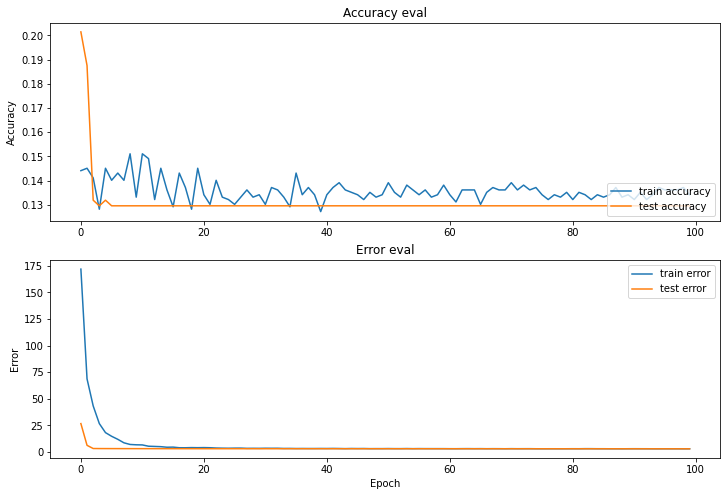

In [98]:
# plot accuracy and error over the epoch : 
plot_history(history)

### OBSERVATIONS:
* the sequential neural network after running over 600 epochs gave a train accuracy of around 0.82 and test accuracy of around 0.55 > Overfitting